<a href="https://colab.research.google.com/github/tg-bomze/Video2Drawing/blob/master/Video2Drawing_(Rus).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><font color="black" size="+4">Стилизатор видео под рисунок</font></b>

<b><font color="black" size="+2">Базируется на:</font></b>

**GitHub репозиторий**: [Unpaired-Portrait-Drawing](https://github.com/yiranran/Unpaired-Portrait-Drawing)

Автор: **[Ran Yi](https://yiranran.github.io).**

<b><font color="black" size="+2">Колаб собрал:</font></b>

GitHub: [@tg-bomze](https://github.com/tg-bomze),
Telegram: [@bomze](https://t.me/bomze),
Twitter: [@tg_bomze](https://twitter.com/tg_bomze).



```
Далее тыкай на кнопки (куда указывает красная стрелка) в каждом блоке поочередно. После нажатия дождись окончания выполнения.
```


```
Если возникают какие-либо ошибки, уберите галочки на delete_log, сделайте скриншот и обратитесь к автору Колаба.
```





In [0]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Устанавливаем необходимые компоненты</font></b>
%%time
!pip install youtube_dl
!pip install ffmpeg
from IPython.display import clear_output

!git clone https://github.com/yiranran/Unpaired-Portrait-Drawing.git
%cd Unpaired-Portrait-Drawing/
!pip install -r requirements.txt
!mkdir checkpoints
!mkdir checkpoints/pretrained
!mkdir test_example
%cd checkpoints/pretrained
!gdown https://drive.google.com/uc?id=1Y7xm2sl7U5DjPcA2OrRfZ8yOl_UdRHKP
!gdown https://drive.google.com/uc?id=1pRrs7USGynJQLmMbLYjcDTtb20oWHqZF
%cd ../..
#@markdown Если в блоке **"Запускаем тестовый прогон"** возникнут ошибки, то решение вы можете найти тут (*внимание, видео из другого проекта, но ход действия похож*): https://youtu.be/j9Yq6t4hUeA

delete_log = True #@param {type:"boolean"}
if delete_log == True: clear_output()

<b><font color="red" size="+2">Перед выполнением следующего блока выберите сверху в меню Runtime > Restart runtime ...</font>

In [0]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Загрузите квадратное видео в формте mp4</font></b>
from google.colab import files
from IPython.display import clear_output
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import imageio
import youtube_dl
import io
import os
import cv2
from google.colab import files
%matplotlib inline
#@markdown *Ниже введите ссылку на видео (например, YouTube или Twitter), либо оставьте поле **source_url** пустым (в таком случае будет предложено загрузить ролик с компьютера).*
%cd /content/Unpaired-Portrait-Drawing
!rm -rf examples/*.*
#@markdown *Тесты проводились на видеозаписях длинною до 1 минуты. Есть вероятность, что большие отрезки могут привести к ошибкам.*
source_url = '' #@param {type:"string"}

if source_url == '':
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
  file_name = "downloaded_video." + fn.split(".")[-1]
  !mv -f $fn $file_name

else:
  try:
    ydl_opts = {
        'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4',
        'outtmpl': 'downloaded_video.mp4',
        }
    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
      ydl.download([source_url])
    file_name = 'downloaded_video.mp4'
  
  except BaseException:
    !wget $source_url
    fn = source_url.split('/')[-1]
    file_name = "downloaded_video." + fn.split(".")[-1]
    !mv -f $fn $file_name

!cp -r downloaded_video.mp4 video.mp4
!rm -rf img
!mkdir img
fps_of_video = int(cv2.VideoCapture(file_name).get(cv2.CAP_PROP_FPS))
frames_of_video = int(cv2.VideoCapture(file_name).get(cv2.CAP_PROP_FRAME_COUNT))

delete_log = True #@param {type:"boolean"}
if delete_log == True: clear_output()
#@markdown *При необходимости конвертировать видео в mp4 можно тут: https://convert-video-online.com*

#@markdown *Если при загрузки файла с компьютера возникнет ошибка, то запустите этот блок заново. Помимо этого не рекомендуется загружать видео, в названии которых есть пробелы или точки.*
clear_output()

In [0]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Разбиваем видео на кадры</font></b>

vidcap = cv2.VideoCapture(file_name)
success,image = vidcap.read()
count = 0
success = True
while success:
  cv2.imwrite("examples/frame%09d.jpg" % count, image)
  success,image = vidcap.read()
  count += 1

# Resize
img = os.listdir("examples/")
img.sort()
for i in img:
  if i != '.ipynb_checkpoints':
    im = Image.open("examples/" + i)
    im = im.resize((512,512), Image.ANTIALIAS)
    im.save("examples/" + i)

In [0]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Запускаем тестовый прогон</font></b>
!rm -rf results
!cp examples/frame000000000.jpg test_example/frame000000000.jpg

exp = 'pretrained'
imgsize = 512
dataroot = 'test_example'
epoch = '200'
gpu_id = '0'

for vec in [[1,0,0],[0,1,0],[0,0,1]]:
    svec = '%d,%d,%d' % (vec[0],vec[1],vec[2])
    img1 = 'imagesstyle%d-%d-%d'%(vec[0],vec[1],vec[2])
    print('results/%s/test_%s/index%s.html'%(exp,epoch,img1[6:]))
    os.system('python test.py --dataroot %s --name %s --model test --output_nc 1 --no_dropout --model_suffix _A --num_test 1000 --epoch %s --imagefolder %s --sinput svec --svec %s --crop_size %d --load_size %d --gpu_ids %s' % (dataroot,exp,epoch,img1,svec,imgsize,imgsize,gpu_id))

delete_log = True #@param {type:"boolean"}
if delete_log == True: clear_output()

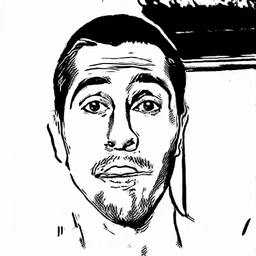

In [7]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Смотрим результаты тестов на примере 3 типов</font></b>
draw_type = '1-0-0' #@param ["0-0-1", "0-1-0", "1-0-0"]
img1 = PIL.Image.open('results/pretrained/test_200/imagesstyle'+draw_type+'/frame000000000_fake.png')
img1 = img1.resize((256,256), PIL.Image.LANCZOS)
display(img1)

In [0]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Выбираем тип и запускаем конвертацию видео в рисунок</font></b>
%%time
!rm -rf results

draw_type = '1-0-0' #@param ["0-0-1", "0-1-0", "1-0-0"]
draw_type = draw_type.split('-')

exp = 'pretrained'
imgsize = 512
dataroot = 'examples'
epoch = '200'
gpu_id = '0'

svec = '%s,%s,%s' % (draw_type[0],draw_type[1],draw_type[2])
img1 = 'imagesstyle'
print('Ожидайте. Это может занять некоторое время.')
os.system('python test.py --dataroot %s --name %s --model test --output_nc 1 --no_dropout --model_suffix _A --num_test 1000 --epoch %s --imagefolder %s --sinput svec --svec %s --crop_size %d --load_size %d --gpu_ids %s' % (dataroot,exp,epoch,'imagesstyle',svec,imgsize,imgsize,gpu_id))

!rm -rf results/pretrained/test_200/imagesstyle/*_real.png
!rm -rf results/pretrained/test_200/imagesstyle/*_rec.png

delete_log = True #@param {type:"boolean"}
if delete_log == True: clear_output()

In [0]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Собираем кадры в видео</font></b>
frames = []
img = os.listdir("results/pretrained/test_200/imagesstyle/")
img.sort()
for i in img:
  frames.append(imageio.imread("results/pretrained/test_200/imagesstyle/"+i))
frames = np.array(frames)
imageio.mimsave("final.mp4", frames, fps=fps_of_video)
!ffmpeg -i downloaded_video.mp4 -vn -ar 44100 -ac 2 -ab 192K -f mp3 sound.mp3
!ffmpeg -i sound.mp3 -i final.mp4 final_audio.mp4

print('Сборка завершена')
delete_log = True #@param {type:"boolean"}
if delete_log == True: clear_output()

In [0]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Скачать итоговое видео</font></b>
files.download("final_audio.mp4")